In [64]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [199]:
model_lookup_name = "llama-3-70b-chat"

In [200]:
folder_path = f'../data/output/{model_lookup_name}'
if not os.path.exists(folder_path):
    print('Files not found')

In [201]:
# Fetch all data from the directory
cont_data = []
cont_file= "cont_generation_1.jsonl"
cont_data = pd.read_json(os.path.join(folder_path, cont_file), lines=True)


Text(0.5, 1.0, 'Number of Topics Over Documents')

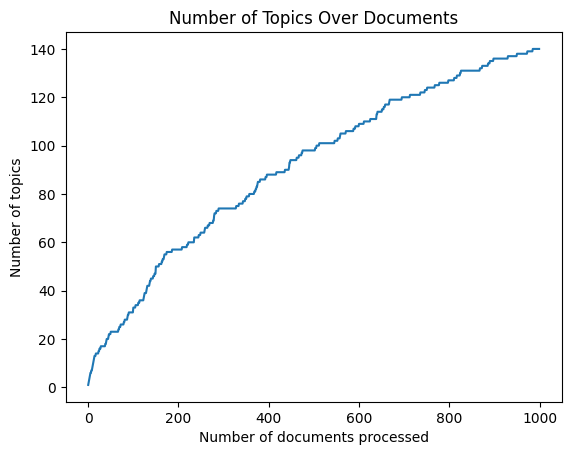

In [202]:
# Plot Number of Topics Over Documents
count_new=[]
count=0
for v in cont_data.topics:
    for topic in v:
        if topic['duplicate']==False:
            count=count+1
    count_new.append(count)
plt.plot(range(len(cont_data)), count_new)
plt.xlabel("Number of documents processed")
plt.ylabel("Number of topics")
plt.title("Number of Topics Over Documents")

In [136]:
# Fetch gen data from the directory
gen_file= "generation_1.jsonl"
generation_json_data = pd.read_json(os.path.join(folder_path, gen_file), lines=True)

In [137]:
resp=[]
for index, row in generation_json_data.iterrows():
    i=row['responses'].split('\n')
    dict_responses={}
    for ind,xml_string in enumerate(i):
        if re.match("Note:", xml_string):
            continue
        if re.match('\[[0-9]*\]',xml_string):
            xml_string=re.sub('\[[0-9]*\] ','',xml_string)
            try:
                # print(xml_string.split(':')[1])
                dict_responses[xml_string.split(':')[0]]=xml_string.split(':')[1].lstrip()

            except:
                # print('no desc found')
                dict_responses[xml_string.split(':')[0]]='NA'
    row['responses']=dict_responses
        
    # if(len(i)!=len(new_i)):print(i,new_i)
print(generation_json_data.responses)

0      {'Telecommunications': 'Mentions technologies ...
1      {'Energy': 'Mentions the production, distribut...
2      {'Materials Science': 'Mentions the properties...
3      {'Engineering': 'Mentions the design and devel...
4      {'Telecommunications': 'NA', 'Energy': 'NA', '...
                             ...                        
995    {'3D Printing': 'Mentions the process of creat...
996    {'Optoelectronics': 'Relates to the study and ...
997    {'Wind Energy': 'Relates to the generation of ...
998    {'Biotechnology': 'Relates to the use of biolo...
999    {'Solar Energy': 'Relates to the generation of...
Name: responses, Length: 1000, dtype: object


In [203]:
generation_json_data.to_json(os.path.join(folder_path, 'generation_1_processed.jsonl'), orient = 'records', index = 'false',lines=True)

 

In [144]:
# Fetch gen data from the directory
gen_md_file= "generation_1.md"
generation_md_data=[]
with open(os.path.join(folder_path, gen_md_file)) as f:
    for line in f:
        generation_md_data.append(line)


In [173]:
arr_count={}
for i,v in enumerate(generation_md_data):
    # print(i,v)
    v=v.split()
    if v==[]:break
    # print(v)
    for c,ind in enumerate(v):
        # print(ind)
        # print(re.search("Count",ind))
        if re.search("Count",ind):
            break
    arr_count[i]=int(v[c+1].replace( "):", ""))
print(arr_count)


{0: 34, 1: 9, 2: 62, 3: 2, 4: 53, 5: 37, 6: 4, 7: 46, 8: 35, 9: 67, 10: 16, 11: 8, 12: 14, 13: 36, 14: 24, 15: 25, 16: 42, 17: 11, 18: 42, 19: 91, 20: 13, 21: 17, 22: 3, 23: 10, 24: 22, 25: 31, 26: 18, 27: 40, 28: 19, 29: 7, 30: 9, 31: 6, 32: 6, 33: 3, 34: 19, 35: 2, 36: 7, 37: 1, 38: 9, 39: 9, 40: 12, 41: 1, 42: 2, 43: 3, 44: 3, 45: 4, 46: 39, 47: 1, 48: 2, 49: 8, 50: 18, 51: 21, 52: 5, 53: 7, 54: 2, 55: 6, 56: 3, 57: 1, 58: 5, 59: 12, 60: 11, 61: 1, 62: 3, 63: 3, 64: 3, 65: 4, 66: 1, 67: 1, 68: 8, 69: 4, 70: 1, 71: 4, 72: 7, 73: 8, 74: 10, 75: 1, 76: 3, 77: 3, 78: 10, 79: 4, 80: 2, 81: 2, 82: 2, 83: 1, 84: 1, 85: 3, 86: 2, 87: 4, 88: 1, 89: 6, 90: 3, 91: 1, 92: 3, 93: 2, 94: 5, 95: 3, 96: 3, 97: 5, 98: 1, 99: 1, 100: 3, 101: 4, 102: 1, 103: 1, 104: 2, 105: 1, 106: 2, 107: 1, 108: 2, 109: 2, 110: 2, 111: 1, 112: 1, 113: 2, 114: 1, 115: 1, 116: 2, 117: 1, 118: 1, 119: 1, 120: 4, 121: 3, 122: 1, 123: 1, 124: 1, 125: 11, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 2, 132: 1, 133: 1, 134

In [174]:
def plots(dict):
    labels = 
    count = 
    fig = plt.figure(figsize = (8, 4))
    # creating the bar plot
    

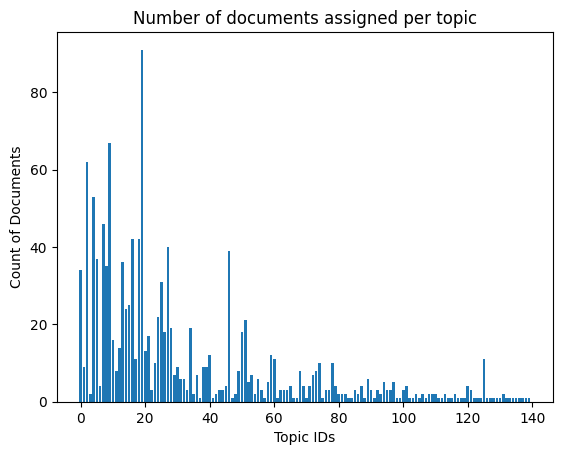

In [219]:
plt.bar(list(arr_count.keys()), list(arr_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()


In [220]:
arr_count_sorted= sorted(arr_count.items(), key=lambda x: x[1], reverse=True)
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(arr_count_sorted)

[(19, 91),
 (9, 67),
 (2, 62),
 (4, 53),
 (7, 46),
 (16, 42),
 (18, 42),
 (27, 40),
 (46, 39),
 (5, 37),
 (13, 36),
 (8, 35),
 (0, 34),
 (25, 31),
 (15, 25),
 (14, 24),
 (24, 22),
 (51, 21),
 (28, 19),
 (34, 19),
 (26, 18),
 (50, 18),
 (21, 17),
 (10, 16),
 (12, 14),
 (20, 13),
 (40, 12),
 (59, 12),
 (17, 11),
 (60, 11),
 (125, 11),
 (23, 10),
 (74, 10),
 (78, 10),
 (1, 9),
 (30, 9),
 (38, 9),
 (39, 9),
 (11, 8),
 (49, 8),
 (68, 8),
 (73, 8),
 (29, 7),
 (36, 7),
 (53, 7),
 (72, 7),
 (31, 6),
 (32, 6),
 (55, 6),
 (89, 6),
 (52, 5),
 (58, 5),
 (94, 5),
 (97, 5),
 (6, 4),
 (45, 4),
 (65, 4),
 (69, 4),
 (71, 4),
 (79, 4),
 (87, 4),
 (101, 4),
 (120, 4),
 (22, 3),
 (33, 3),
 (43, 3),
 (44, 3),
 (56, 3),
 (62, 3),
 (63, 3),
 (64, 3),
 (76, 3),
 (77, 3),
 (85, 3),
 (90, 3),
 (92, 3),
 (95, 3),
 (96, 3),
 (100, 3),
 (121, 3),
 (3, 2),
 (35, 2),
 (42, 2),
 (48, 2),
 (54, 2),
 (80, 2),
 (81, 2),
 (82, 2),
 (86, 2),
 (93, 2),
 (104, 2),
 (106, 2),
 (108, 2),
 (109, 2),
 (110, 2),
 (113, 2),
 (116

In [221]:
count =0
dict_count={}
for i in arr_count_sorted:
    dict_count[i[1]]=dict_count.get(i[1],0)+1
    if i[1]==2:
        count=count+1
        # print(i)
print(dict_count)

{91: 1, 67: 1, 62: 1, 53: 1, 46: 1, 42: 2, 40: 1, 39: 1, 37: 1, 36: 1, 35: 1, 34: 1, 31: 1, 25: 1, 24: 1, 22: 1, 21: 1, 19: 2, 18: 2, 17: 1, 16: 1, 14: 1, 13: 1, 12: 2, 11: 3, 10: 3, 9: 4, 8: 4, 7: 4, 6: 4, 5: 4, 4: 9, 3: 17, 2: 18, 1: 42}


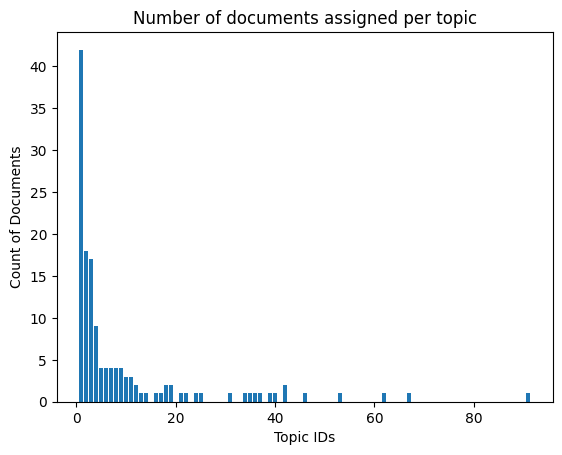

In [222]:
plt.bar(list(dict_count.keys()), list(dict_count.values()))
plt.xlabel("Topic IDs")
plt.ylabel("Count of Documents")
plt.title("Number of documents assigned per topic")
plt.show()



In [204]:
# Fetch gen data from the directory
gen_file= "generation_1_processed.jsonl"
generation_json_data = pd.read_json(os.path.join(folder_path, gen_file), lines=True)

In [214]:
no_doc={}
for i,v in generation_json_data.iterrows():
    no_doc[len(v.responses)]=no_doc.get(len(v.responses),0)+1
print(no_doc)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 5, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 1, 27: 1, 28: 2, 29: 1, 30: 1, 31: 2, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 2, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 2, 50: 1, 51: 2, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 2, 74: 1, 75: 1, 76: 2, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 2, 101: 1, 102: 1, 103: 2, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 2, 113: 1, 114: 2, 115: 4, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 2, 125: 1, 126: 2, 127: 1, 128: 1, 129: 1, 130: 1, 131: 2, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 

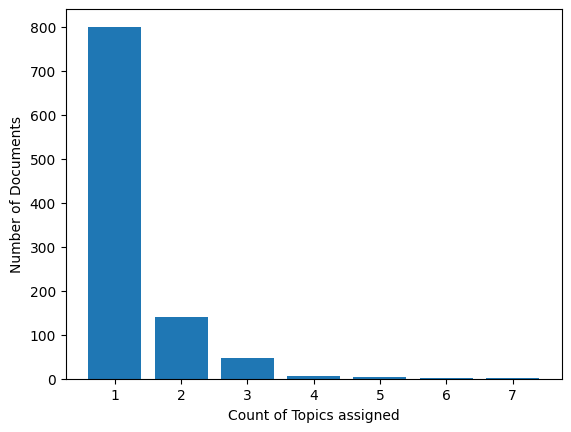

In [226]:
plt.bar(list(no_doc.keys()), list(no_doc.values()))
plt.xlabel("Count of Topics assigned")
plt.ylabel("Number of Documents")
plt.show()